# **Fake News Predictor** 

Sonali Shanbhag, Shakti Balaji, Riddhi Gupta (Team 1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 1: Import required libraries, packages and corpora

In [ ]:
import pandas as pd
import numpy as np
import re 
import nltk
import sklearn
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn

In [ ]:
#Download the corpus of stopwords from NLTK (Natural Language Toolkit)
nltk.download("stopwords") 
#Instantiate ProterStemmer()
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Step 2. Read the dataset

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/covid-news-dataset.csv")

In [ ]:
dataset.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


### Step 3. Data Pre-Processing

In [ ]:
dataset.shape

(6420, 3)

#### i. Check for Missing Values (NaN)

In [ ]:
dataset = dataset.dropna(how='any',axis=0) 

In [ ]:
dataset.isnull().sum()

id       0
tweet    0
label    0
dtype: int64

#### ii. Pre-Processing Function

Using Regular Expressions, remove all non-textual data including symbols, special characters, emojis and numbers.
Normalize the case by converting all to lower case.
Split the sentences into words, reduce the words to their stems and remove any stop words.
Rejoin the split words with a whitespace to form a simple, cleaned sentence.


In [ ]:
def preprocess_column(col_name, col_length):
  preprocessed_data = []
  for i in range(0,col_length):
        col_value = dataset[col_name][i]
        col_value = re.sub('[^a-zA-Z]', ' ', col_value)
        col_value = col_value.lower()
        col_value = col_value.split()
        col_value = [ps.stem(word) for word in col_value if not word in set(stopwords.words('english'))]
        col_value = ' '.join(col_value)
        preprocessed_data.append(col_value)
  return preprocessed_data

In [ ]:
#Calling the function for column "tweet"
preprocessed_train = preprocess_column("tweet",6420)

#### iii. Handling Categorical Values- Label Encoding
Replace the categories in the dependent (y) column with numeric values for easier processing in the machine-readable form.
Here, we have "Real" and "Fake" which will be assigned values "1" and "0" respectively (according to alphabetical order)

In [ ]:
le=LabelEncoder()
dataset['label']=le.fit_transform(dataset['label'])

### **Count Vectorizer**

### Step 4. Feature Extraction using Count Vectorizer

Convert a collection of text documents to a sparse matrix representation of token counts. Or, quite simply, it is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [ ]:
cv = CountVectorizer(max_features = 2000)
x = cv.fit_transform(preprocessed_train).toarray() #preprocessed tweets in the form of a sparse matrix

In [ ]:
#Define the dependent variable (prediction column)
y = dataset.iloc[:,2:3].values

### Step 5. Split the dataset into Train and Test sets

Here, we are using a 20-80 ratio, assigning an alias of "0" to this particular random state.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5136, 2000)
(5136, 1)
(1284, 2000)
(1284, 1)


### **Logistic Regression**

It is a classification algorithm in machine learning that uses one or more independent variables to determine an outcome. The outcome is measured with a dichotomous variable which means it will have only two possible outcomes. For example, it may be used to determine if an email is spam or not, using the rate of misspelled words, a common sign of spam.

Here, we are using it to detect whether the news headline is **fake** or **real**. 

In [ ]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_ypred=lr.predict(x_test)
lr_acc = sklearn.metrics.accuracy_score(y_test, lr_ypred)
print("Logistic Regression Accuracy: ")
print(lr_acc*100,"%")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy: 
92.7570093457944 %


In [ ]:
# pr= lr.predict(cv.transform([text_cleaner(headline2)]))
# if pr>0.5:
#   print("Real")
# else:
#   print("Fake!")

### **Naive Bayes Classifier**

Naive Bayes algorithm is based on Bayes’ theorem with the assumption of independence between every pair of features. It assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. Even if the features depend on each other, all of these properties contribute to the probability independently.

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_ypred=nb.predict(x_test)
nb_acc = sklearn.metrics.accuracy_score(y_test,nb_ypred)
print("Naive Bayes Accuracy: ")
print(nb_acc*100,"%")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naive Bayes Accuracy: 
87.14953271028037 %


### **Stochastic Gradient Descent**

Stochastic Gradient Descent is particularly useful when the sample data is in a large number. It supports different loss functions and penalties for classification. It refers to calculating the derivative from each training data instance and calculating the update immediately and it also iteratively makes small adjustments to a machine learning network configuration to decrease the error of the network.

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='modified_huber',shuffle=True, random_state=15)
sgd.fit(x_train,y_train)
sgd_ypred=sgd.predict(x_test)
sgd_acc = sklearn.metrics.accuracy_score(y_test,sgd_ypred)
print("Stochastic Gradient Descent Accuracy: ")
print(sgd_acc*100,"%")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stochastic Gradient Descent Accuracy: 
91.04361370716511 %


### **K-Nearest Neighbour**

Nearest-Neighbour based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the 'k' nearest neighbours of each point.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn_ypred=knn.predict(x_test)
knn_acc = sklearn.metrics.accuracy_score(y_test,knn_ypred)
print("K-Nearest Neighbour Accuracy: ")
print(knn_acc*100,"%")

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K-Nearest Neighbour Accuracy: 
77.80373831775701 %


### **Decision Tree**

Decision Tree builds models in the form of a tree structure. It classifies data into finer and finer categories: from tree trunk to branches to leaves. It uses the if-then rule of mathematics to create sub-categories that fit into broader categories and allows for precise, organic categorization.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Note: tweak values for max acc
dtree=DecisionTreeClassifier(max_depth=40,random_state=18,max_features=None, min_samples_leaf=8)
dtree.fit(x_train,y_train)
dtree_ypred=dtree.predict(x_test)
dtree_acc = sklearn.metrics.accuracy_score(y_test,dtree_ypred)
print("Decision Tree Accuracy: ")
print(dtree_acc*100,"%")

Decision Tree Accuracy: 
87.53894080996885 %


### **Random Forest** 

Random decision trees or random forest are an ensemble learning method for classification, regression, etc.  meaning that a random forest model is made up of a large number of small decision trees, called estimators, which each produce their own predictions. The random forest model combines the predictions of the estimators to produce a more accurate prediction.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfm=RandomForestClassifier(n_estimators=75,oob_score=True,n_jobs=-1, random_state=20,max_features=None,min_samples_leaf=2)
rfm.fit(x_train,y_train)
rfm_ypred=rfm.predict(x_test)
rfm_acc = sklearn.metrics.accuracy_score(y_test,rfm_ypred)
print("Random Forest Accuracy: ")
print(rfm_acc*100,"%")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest Accuracy: 
90.57632398753894 %


### **Support Vector Machine**

Support vector machine is a classifier that represents the training data as points in space separated into categories by a gap as wide as possible. New points are then added to space by predicting which category they fall into and which space they will belong to.



In [ ]:
from sklearn.svm import SVC 
svm=SVC(kernel="linear",C=0.025,random_state=None)
svm.fit(x_train,y_train)
svm_ypred=svm.predict(x_test)
svm_acc = sklearn.metrics.accuracy_score(y_test,svm_ypred)
print("Support Vector Machine Accuracy: ")
print(svm_acc*100,"%")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machine Accuracy: 
92.13395638629284 %


### **Classification ANN**

Classification ANNs seek to classify an observation as belonging to some discrete class as a function of the inputs. The input features (independent variables) can be categorical or numeric types, however, we require a categorical feature as the dependent variable.

### Compile and fit the model

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
#Using a Sequential Model
model = Sequential()
model.add(Dense(units = 2000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(layers.BatchNormalization())
model.add(Dense(units = 1, kernel_initializer = "random_uniform", activation = "sigmoid"))

In [ ]:
model.compile(optimizer = "adam", loss="binary_crossentropy", metrics= ["accuracy"])
ann = model.fit(x_train,y_train, epochs = 5,verbose=1, steps_per_epoch=50, validation_data= (x_test, y_test))

Epoch 1/5
50/50 [==============================] - 173s 3s/step - loss: 1.5185 - accuracy: 0.5463 - val_loss: 0.9394 - val_accuracy: 0.3575
Epoch 2/5
50/50 [==============================] - 171s 3s/step - loss: 0.5300 - accuracy: 0.7599 - val_loss: 0.3542 - val_accuracy: 0.8879
Epoch 3/5
50/50 [==============================] - 172s 3s/step - loss: 0.1675 - accuracy: 0.9365 - val_loss: 0.4393 - val_accuracy: 0.8528
Epoch 4/5
50/50 [==============================] - 171s 3s/step - loss: 0.0611 - accuracy: 0.9776 - val_loss: 0.3867 - val_accuracy: 0.8980
Epoch 5/5
50/50 [==============================] - 168s 3s/step - loss: 0.0277 - accuracy: 0.9908 - val_loss: 0.3526 - val_accuracy: 0.9097


In [ ]:
ann_ypred= model.predict(x_test)

In [ ]:
for i in range(len(ann_ypred)):
    if ann_ypred[i]>0.5:
        ann_ypred[i]=1
    elif ann_ypred[i]<=0.5:
        ann_ypred[i]=0

In [ ]:
ann_acc = sklearn.metrics.accuracy_score(y_test, ann_ypred)
print("ANN Accuracy: ")
print(ann_acc*100,"%")

ANN Accuracy: 
90.96573208722741 %


### **Sample Headlines for Testing**

In [ ]:
headline1 = "Social gatherings of more than six people will be banned across England Wales and Scotland from tomorrow. But what are the new rules what happens if you break them and how do they differ across the nations? ðŸ‘‡"
headline2 = "Korona virus, very new deadly form of virus, china is suffering, may come to India immediately, avoid any form of cold drinks, ice creams, koolfee, etc, any type of preserved foods, milkshake, rough ice, ice colas, milk sweets older then 48 hours, for atleast 90 days from today."
headline3 = "As tuberculosis shaped modernism, so COVID-19 and our collective experience of staying inside for months on end will influence architectureâ€™s near future, @chaykak writes. https://t.co/ag34yZckbU"
headline4 = "SUBHAN ALLAH: AFTER CORONA VIRUS CHINA GOVT LIFTED BAN ON HOLY QURAN & ALLOWED CHINESE MUSLIMS TO READ THEIR SACRED BOOK! SO WHICH OF THE FAVORS OF YOUR LORD WOULD YOU DENY?"
headline5 = "#IndiaFightsCorona Following the national trend 17 States/UTs have more new recoveries than new cases. https://t.co/aHWwlaimmb"

In [ ]:
#predictor(text_cleaner(headline2))

### Functions for Input Processing

In [ ]:
#function to clean the input text
def text_cleaner(text):
  text = re.sub('[^a-zA-Z]', ' ', text) 
  text = text.lower()
  text = text.split() 
  text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
  text = ' '.join(text)
  return text

In [ ]:
#function to predict
# def predictor(text):
#   if (model.predict(cv.transform([text])))>0.5:
#     print("Real")
#   else:
#     print("Fake!")

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Logistic Regression

cm_lr = confusion_matrix(y_test, lr_ypred)
print('For Logistic Regression')
print('Confusion Matrix: ')
print(cm_lr)
acc_lr = accuracy_score(y_test, lr_ypred)
pre_lr = precision_score(y_test, lr_ypred)
rec_lr = recall_score(y_test, lr_ypred)
f1_lr = f1_score(y_test, lr_ypred)
print('Accuracy Score: ',acc_lr)
print('Precision Score: ',pre_lr)
print('Recall Score: ',rec_lr)
print('F1 Score: ',f1_lr)

For Logistic Regression
Confusion Matrix: 
[[582  45]
 [ 48 609]]
Accuracy Score:  0.927570093457944
Precision Score:  0.9311926605504587
Recall Score:  0.9269406392694064
F1 Score:  0.9290617848970252


In [ ]:
# Naive Bayes

cm_nb = confusion_matrix(y_test, nb_ypred)
print('For Naive Bayes')
print('Confusion Matrix: ')
print(cm_nb)
acc_nb = accuracy_score(y_test, nb_ypred)
pre_nb = precision_score(y_test, nb_ypred)
rec_nb = recall_score(y_test, nb_ypred)
f1_nb = f1_score(y_test, nb_ypred)
print('Accuracy Score: ',acc_nb)
print('Precision Score: ',pre_nb)
print('Recall Score: ',rec_nb)
print('F1 Score: ',f1_nb)

For Naive Bayes
Confusion Matrix: 
[[554  73]
 [ 92 565]]
Accuracy Score:  0.8714953271028038
Precision Score:  0.8855799373040752
Recall Score:  0.8599695585996956
F1 Score:  0.8725868725868726


In [ ]:
# Stochastic Gradient Descent

cm_sgd = confusion_matrix(y_test, sgd_ypred)
print('For Stochastic Gradient Descent')
print('Confusion Matrix: ')
print(cm_sgd)
acc_sgd = accuracy_score(y_test, sgd_ypred)
pre_sgd = precision_score(y_test, sgd_ypred)
rec_sgd = recall_score(y_test, sgd_ypred)
f1_sgd = f1_score(y_test, sgd_ypred)
print('Accuracy Score: ',acc_sgd)
print('Precision Score: ',pre_sgd)
print('Recall Score: ',rec_sgd)
print('F1 Score: ',f1_sgd)

For Stochastic Gradient Descent
Confusion Matrix: 
[[567  60]
 [ 55 602]]
Accuracy Score:  0.910436137071651
Precision Score:  0.9093655589123867
Recall Score:  0.9162861491628614
F1 Score:  0.9128127369219106


In [ ]:
# KNN 

cm_knn = confusion_matrix(y_test, knn_ypred)
print('For KNN')
print('Confusion Matrix: ')
print(cm_knn)
acc_knn = accuracy_score(y_test, knn_ypred)
pre_knn = precision_score(y_test, knn_ypred)
rec_knn = recall_score(y_test, knn_ypred)
f1_knn = f1_score(y_test, knn_ypred)
print('Accuracy Score: ',acc_knn)
print('Precision Score: ',pre_knn)
print('Recall Score: ',rec_knn)
print('F1 Score: ',f1_knn)

For KNN
Confusion Matrix: 
[[581  46]
 [239 418]]
Accuracy Score:  0.7780373831775701
Precision Score:  0.9008620689655172
Recall Score:  0.6362252663622526
F1 Score:  0.7457627118644068


In [ ]:
# Decision Tree

cm_dtree = confusion_matrix(y_test, dtree_ypred)
print('For Decision Tree')
print('Confusion Matrix: ')
print(cm_dtree)
acc_dtree = accuracy_score(y_test, dtree_ypred)
pre_dtree = precision_score(y_test, dtree_ypred)
rec_dtree = recall_score(y_test, dtree_ypred)
f1_dtree = f1_score(y_test, dtree_ypred)
print('Accuracy Score: ',acc_dtree)
print('Precision Score: ',pre_dtree)
print('Recall Score: ',rec_dtree)
print('F1 Score: ',f1_dtree)

For Decision Tree
Confusion Matrix: 
[[549  78]
 [ 82 575]]
Accuracy Score:  0.8753894080996885
Precision Score:  0.8805513016845329
Recall Score:  0.8751902587519026
F1 Score:  0.8778625954198473


In [ ]:
# Random Forest

cm_rfm = confusion_matrix(y_test, rfm_ypred)
print('For Random Forest')
print('Confusion Matrix: ')
print(cm_rfm)
acc_rfm = accuracy_score(y_test, rfm_ypred)
pre_rfm = precision_score(y_test, rfm_ypred)
rec_rfm = recall_score(y_test, rfm_ypred)
f1_rfm = f1_score(y_test, rfm_ypred)
print('Accuracy Score: ',acc_rfm)
print('Precision Score: ',pre_rfm)
print('Recall Score: ',rec_rfm)
print('F1 Score: ',f1_rfm)

For Random Forest
Confusion Matrix: 
[[555  72]
 [ 49 608]]
Accuracy Score:  0.9057632398753894
Precision Score:  0.8941176470588236
Recall Score:  0.9254185692541856
F1 Score:  0.9094988780852655


In [ ]:
# SVM

cm_svm = confusion_matrix(y_test, svm_ypred)
print('For SVM')
print('Confusion Matrix: ')
print(cm_svm)
acc_svm = accuracy_score(y_test, svm_ypred)
pre_svm = precision_score(y_test, svm_ypred)
rec_svm = recall_score(y_test, svm_ypred)
f1_svm = f1_score(y_test, svm_ypred)
print('Accuracy Score: ',acc_svm)
print('Precision Score: ',pre_svm)
print('Recall Score: ',rec_svm)
print('F1 Score: ',f1_svm)

For SVM
Confusion Matrix: 
[[583  44]
 [ 57 600]]
Accuracy Score:  0.9213395638629284
Precision Score:  0.9316770186335404
Recall Score:  0.91324200913242
F1 Score:  0.9223674096848578


In [ ]:
# ANN

cm_ann = confusion_matrix(y_test, ann_ypred)
print('For ANN')
print('Confusion Matrix: ')
print(cm_ann)
acc_ann = accuracy_score(y_test, ann_ypred)
pre_ann = precision_score(y_test, ann_ypred)
rec_ann = recall_score(y_test, ann_ypred)
f1_ann = f1_score(y_test, ann_ypred)
print('Accuracy Score: ',acc_ann)
print('Precision Score: ',pre_ann)
print('Recall Score: ',rec_ann)
print('F1 Score: ',f1_ann)

For ANN
Confusion Matrix: 
[[558  69]
 [ 47 610]]
Accuracy Score:  0.9096573208722741
Precision Score:  0.898379970544919
Recall Score:  0.928462709284627
F1 Score:  0.9131736526946107


## Classification Report

In [ ]:
from sklearn.metrics import classification_report

targetNames=['Real News', 'Fake News']

In [ ]:
print('For LR')
print(classification_report(y_test, lr_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For Naive Bayes')
print(classification_report(y_test, nb_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For SGD')
print(classification_report(y_test, sgd_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For KNN')
print(classification_report(y_test, knn_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For Decision Tree')
print(classification_report(y_test, dtree_ypred, target_names=targetNames))
print('For Random Forest')
print(classification_report(y_test, rfm_ypred, target_names=targetNames))
print('For SVM')
print(classification_report(y_test, svm_ypred, target_names=targetNames))
print('For ANN')
print(classification_report(y_test, ann_ypred, target_names=targetNames))

For LR
              precision    recall  f1-score   support

   Real News       0.92      0.93      0.93       627
   Fake News       0.93      0.93      0.93       657

    accuracy                           0.93      1284
   macro avg       0.93      0.93      0.93      1284
weighted avg       0.93      0.93      0.93      1284

-----------------------------------------------------------------
For Naive Bayes
              precision    recall  f1-score   support

   Real News       0.86      0.88      0.87       627
   Fake News       0.89      0.86      0.87       657

    accuracy                           0.87      1284
   macro avg       0.87      0.87      0.87      1284
weighted avg       0.87      0.87      0.87      1284

-----------------------------------------------------------------
For SGD
              precision    recall  f1-score   support

   Real News       0.91      0.90      0.91       627
   Fake News       0.91      0.92      0.91       657

    accuracy       

## Heat Map

In [ ]:
import seaborn as sns

For Logistic Regression, Confusion Matrix: 
[[582  45]
 [ 48 609]]


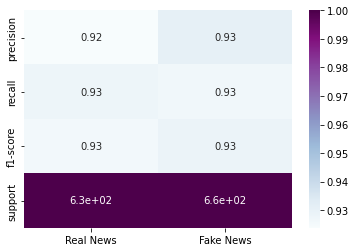

In [ ]:
# Logistic Regression

clf_report_lr = classification_report(y_test, lr_ypred, target_names=targetNames, output_dict= True)
cleaned_report_lr = {}

cleaned_report_lr['Real News'] = clf_report_lr['Real News']
cleaned_report_lr['Fake News'] = clf_report_lr['Fake News']

print('For Logistic Regression, Confusion Matrix: ')
print(cm_lr)
sns.heatmap(pd.DataFrame(cleaned_report_lr), annot=True, vmax=1.0, cmap="BuPu")

For Naive Bayes, Confusion Matrix: 
[[554  73]
 [ 92 565]]


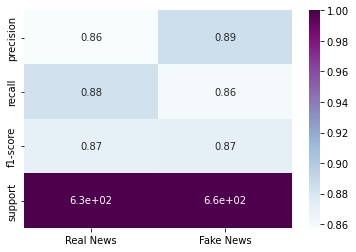

In [ ]:
# Naive Bayes

clf_report_nb = classification_report(y_test, nb_ypred, target_names=targetNames, output_dict= True)
cleaned_report_nb = {}

cleaned_report_nb['Real News'] = clf_report_nb['Real News']
cleaned_report_nb['Fake News'] = clf_report_nb['Fake News']

print('For Naive Bayes, Confusion Matrix: ')
print(cm_nb)
sns.heatmap(pd.DataFrame(cleaned_report_nb), annot=True, vmax=1.0, cmap="BuPu")

For Stochastic Gradient Descent, Confusion Matrix: 
[[567  60]
 [ 55 602]]


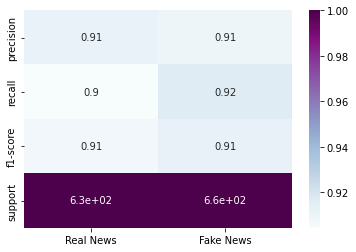

In [ ]:
# Stochastic Gradient Descent

clf_report_sgd = classification_report(y_test, sgd_ypred, target_names=targetNames, output_dict= True)
cleaned_report_sgd = {}

cleaned_report_sgd['Real News'] = clf_report_sgd['Real News']
cleaned_report_sgd['Fake News'] = clf_report_sgd['Fake News']

print('For Stochastic Gradient Descent, Confusion Matrix: ')
print(cm_sgd)
sns.heatmap(pd.DataFrame(cleaned_report_sgd), annot=True, vmax=1.0, cmap="BuPu")

For KNN, Confusion Matrix: 
[[581  46]
 [239 418]]


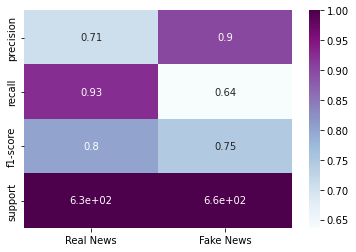

In [ ]:
# KNN

clf_report_knn = classification_report(y_test, knn_ypred, target_names=targetNames, output_dict= True)
cleaned_report_knn = {}

cleaned_report_knn['Real News'] = clf_report_knn['Real News']
cleaned_report_knn['Fake News'] = clf_report_knn['Fake News']

print('For KNN, Confusion Matrix: ')
print(cm_knn)
sns.heatmap(pd.DataFrame(cleaned_report_knn), annot=True, vmax=1.0, cmap="BuPu")

For Decision Tree, Confusion Matrix: 
[[549  78]
 [ 82 575]]


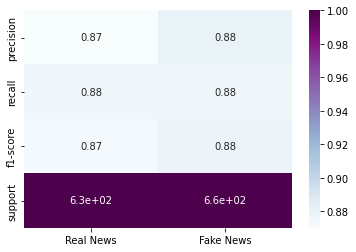

In [ ]:
# Decision Tree

clf_report_dtree = classification_report(y_test, dtree_ypred, target_names=targetNames, output_dict= True)
cleaned_report_dtree = {}

cleaned_report_dtree['Real News'] = clf_report_dtree['Real News']
cleaned_report_dtree['Fake News'] = clf_report_dtree['Fake News']

print('For Decision Tree, Confusion Matrix: ')
print(cm_dtree)
sns.heatmap(pd.DataFrame(cleaned_report_dtree), annot=True, vmax=1.0, cmap="BuPu")

For Random Forest, Confusion Matrix: 
[[555  72]
 [ 49 608]]


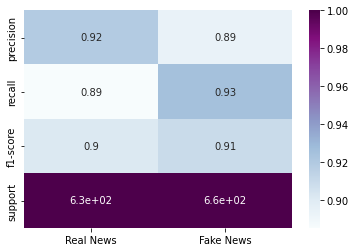

In [ ]:
# Random Forest

clf_report_rfm = classification_report(y_test, rfm_ypred, target_names=targetNames, output_dict= True)
cleaned_report_rfm = {}

cleaned_report_rfm['Real News'] = clf_report_rfm['Real News']
cleaned_report_rfm['Fake News'] = clf_report_rfm['Fake News']

print('For Random Forest, Confusion Matrix: ')
print(cm_rfm)
sns.heatmap(pd.DataFrame(cleaned_report_rfm), annot=True, vmax=1.0, cmap="BuPu")

For SVM, Confusion Matrix: 
[[583  44]
 [ 57 600]]


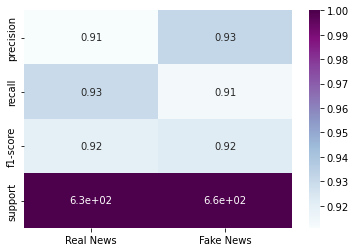

In [ ]:
# SVM

clf_report_svm = classification_report(y_test, svm_ypred, target_names=targetNames, output_dict= True)
cleaned_report_svm = {}

cleaned_report_svm['Real News'] = clf_report_svm['Real News']
cleaned_report_svm['Fake News'] = clf_report_svm['Fake News']

print('For SVM, Confusion Matrix: ')
print(cm_svm)
sns.heatmap(pd.DataFrame(cleaned_report_svm), annot=True, vmax=1.0, cmap="BuPu")

For ANN, Confusion Matrix: 
[[558  69]
 [ 47 610]]


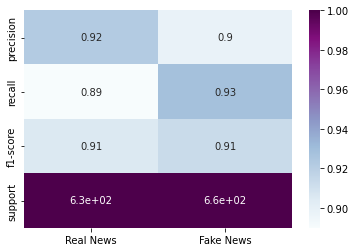

In [ ]:
# ANN

clf_report_ann = classification_report(y_test, ann_ypred, target_names=targetNames, output_dict= True)
cleaned_report_ann = {}

cleaned_report_ann['Real News'] = clf_report_ann['Real News']
cleaned_report_ann['Fake News'] = clf_report_ann['Fake News']

print('For ANN, Confusion Matrix: ')
print(cm_ann)
sns.heatmap(pd.DataFrame(cleaned_report_ann), annot=True, vmax=1.0, cmap="BuPu")

## Visualization of Algorithm Evaluation Metrics

In [ ]:
accuracies = {"LR": acc_lr,  
             "Naive": acc_nb, 
             "SGD": acc_sgd,
             "KNN": acc_knn, 
             "DT": acc_dtree,
            "RFM": acc_rfm,
            "SVM": acc_svm,
            "ANN": acc_ann 
             }

precisions = {"LR": pre_lr,  
             "Naive": pre_nb, 
             "SGD": pre_sgd,
             "KNN": pre_knn, 
             "DT": pre_dtree,
            "RFM": pre_rfm,
            "SVM": pre_svm,
            "ANN": pre_ann
             }

recalls = {"LR": rec_lr,  
             "Naive": rec_nb, 
             "SGD": rec_sgd,
             "KNN": rec_knn, 
             "DT": rec_dtree,
            "RFM": rec_rfm,
            "SVM": rec_svm,
           "ANN": rec_ann 
             }

f1s = {"LR": f1_lr,  
        "Naive": f1_nb, 
        "SGD": f1_sgd,
        "KNN": f1_knn, 
        "DT": f1_dtree,
      "RFM": f1_rfm,
      "SVM": f1_svm,
       "ANN": f1_ann 
        }

In [ ]:
print("Classification models in descending order of Accuracy:")
sorted(accuracies.items(), key=lambda x: x[1],reverse=True)

Classification models in descending order of Accuracy:


[('LR', 0.927570093457944),
 ('SVM', 0.9213395638629284),
 ('SGD', 0.910436137071651),
 ('ANN', 0.9096573208722741),
 ('RFM', 0.9057632398753894),
 ('DT', 0.8753894080996885),
 ('Naive', 0.8714953271028038),
 ('KNN', 0.7780373831775701)]

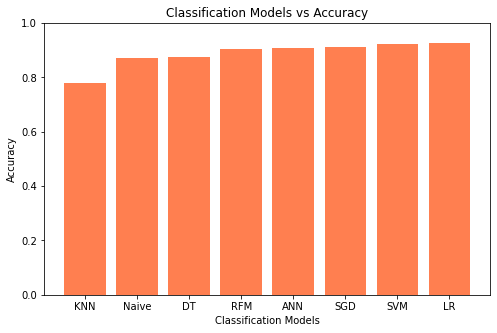

In [ ]:
lists = sorted(accuracies.items(), key=lambda x: x[1]*100) # sorted by key, return a list of tuples

plt.figure(figsize=(8,5))
plt.bar(*zip(*lists), color="coral")
plt.ylim(0,1)
plt.title('Classification Models vs Accuracy')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
print("Classification models in descending order of Precision:")
sorted(precisions.items(), key=lambda x: x[1],reverse=True)

Classification models in descending order of Precision:


[('SVM', 0.9316770186335404),
 ('LR', 0.9311926605504587),
 ('SGD', 0.9093655589123867),
 ('KNN', 0.9008620689655172),
 ('ANN', 0.898379970544919),
 ('RFM', 0.8941176470588236),
 ('Naive', 0.8855799373040752),
 ('DT', 0.8805513016845329)]

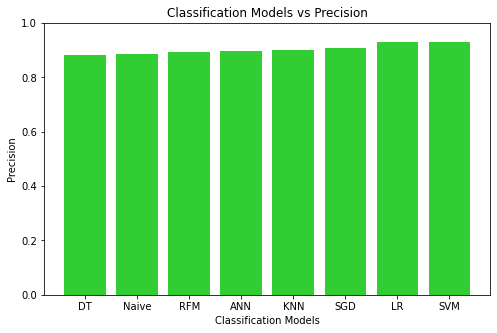

In [ ]:
lists = sorted(precisions.items(), key=lambda x: x[1]*100) # sorted by key, return a list of tuples

plt.figure(figsize=(8,5))
plt.bar(*zip(*lists), color="limegreen")
plt.ylim(0,1)
plt.title('Classification Models vs Precision')
plt.xlabel('Classification Models')
plt.ylabel('Precision')
plt.show()

In [ ]:
print("Classification models in descending order of Recall:")
sorted(recalls.items(), key=lambda x: x[1],reverse=True)

Classification models in descending order of Recall:


[('ANN', 0.928462709284627),
 ('LR', 0.9269406392694064),
 ('RFM', 0.9254185692541856),
 ('SGD', 0.9162861491628614),
 ('SVM', 0.91324200913242),
 ('DT', 0.8751902587519026),
 ('Naive', 0.8599695585996956),
 ('KNN', 0.6362252663622526)]

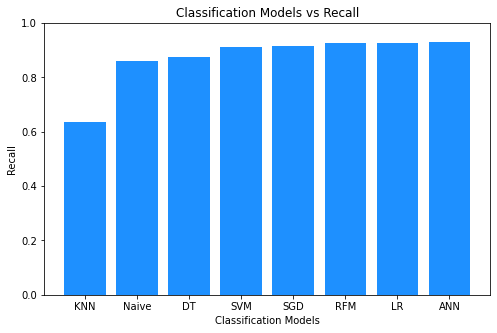

In [ ]:
lists = sorted(recalls.items(), key=lambda x: x[1]*100) # sorted by key, return a list of tuples

plt.figure(figsize=(8,5))
plt.bar(*zip(*lists), color="dodgerblue")
plt.ylim(0,1)
plt.title('Classification Models vs Recall')
plt.xlabel('Classification Models')
plt.ylabel('Recall')
plt.show()

In [ ]:
print("Classification models in descending order of F1:")
sorted(f1s.items(), key=lambda x: x[1],reverse=True)

Classification models in descending order of F1:


[('LR', 0.9290617848970252),
 ('SVM', 0.9223674096848578),
 ('ANN', 0.9131736526946107),
 ('SGD', 0.9128127369219106),
 ('RFM', 0.9094988780852655),
 ('DT', 0.8778625954198473),
 ('Naive', 0.8725868725868726),
 ('KNN', 0.7457627118644068)]

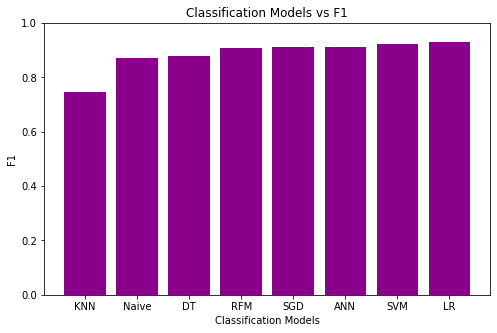

In [ ]:
lists = sorted(f1s.items(), key=lambda x: x[1]*100) # sorted by key, return a list of tuples

plt.figure(figsize=(8,5))
plt.bar(*zip(*lists), color="darkmagenta")
plt.ylim(0,1)
plt.title('Classification Models vs F1')
plt.xlabel('Classification Models')
plt.ylabel('F1')
plt.show()

### Save the model as a .h5 file

Since this model has the highest accuracy, we will be using this for the prediction during the deployment of our application.

In [ ]:
#Using a Logistic Regression Model
model = LogisticRegression()
log_reg = model.fit(x_train,y_train)
logRegre_ypred= model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from keras.models import load_model
import pickle

pickle.dump(model, open("fake_news.h5", 'wb'))
with open('vectorizer_lr', 'wb') as fin:
    pickle.dump(model, fin)

## Resources for Prediction Verification

In [ ]:
!pip install beautifulsoup4
!pip install google
from googlesearch import search

In [ ]:
print("Here are some resources that could verify our prediction: ")
query = headline1 #enter headline here
for j in search(query, tld="com", stop=5, pause=1):
  print(j)

Here are some resources that could verify our prediction: 
https://abcnews.go.com/Health/wireStory/uk-imposes-coronavirus-restrictions-england-72907229
https://www.bbc.com/news/uk-54142699
https://www.bbc.com/news/uk-scotland-54140766
https://www.tribuneindia.com/news/world/rule-of-six-comes-in-to-limit-gatherings-in-englands-covid-19-fight-141148
https://www.unhcr.org/56bb369c9.pdf
